<a href="https://colab.research.google.com/github/henrygas/ctr/blob/master/0_ctr_data_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 准备工作

### 0.1 在本地计算机上，先读取前10000条数据，并保存这批数据到csv中

In [0]:
import pandas as pd

data_path = "./data/train.csv"
chunks = pd.read_csv(data_path, iterator=True)
chunk = chunks.get_chunk(10000)
print(type(chunk))
print(chunk.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
id                  10000 non-null uint64
click               10000 non-null int64
hour                10000 non-null int64
C1                  10000 non-null int64
banner_pos          10000 non-null int64
site_id             10000 non-null object
site_domain         10000 non-null object
site_category       10000 non-null object
app_id              10000 non-null object
app_domain          10000 non-null object
app_category        10000 non-null object
device_id           10000 non-null object
device_ip           10000 non-null object
device_model        10000 non-null object
device_type         10000 non-null int64
device_conn_type    10000 non-null int64
C14                 10000 non-null int64
C15                 10000 non-null int64
C16                 10000 non-null int64
C17                 10000 non-null int64
C18                 10000 non-null int64
C19                 1

In [0]:
data_part_path = "./data/train_part.csv"
chunk.to_csv(data_part_path, index=False, header=True)


### 0.2 挂载Google云盘

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 0.3 定位当前工作目录

In [0]:
import os
os.chdir("./drive/My Drive/app/ctr")

In [4]:
!ls

data  model  out


## 1. 数据探索

### 1.1 读取train_part.csv数据，并查看基本信息

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data_part_path = "./data/train_part.csv"
train_data = pd.read_csv(data_part_path)

In [7]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
id                  10000 non-null uint64
click               10000 non-null int64
hour                10000 non-null int64
C1                  10000 non-null int64
banner_pos          10000 non-null int64
site_id             10000 non-null object
site_domain         10000 non-null object
site_category       10000 non-null object
app_id              10000 non-null object
app_domain          10000 non-null object
app_category        10000 non-null object
device_id           10000 non-null object
device_ip           10000 non-null object
device_model        10000 non-null object
device_type         10000 non-null int64
device_conn_type    10000 non-null int64
C14                 10000 non-null int64
C15                 10000 non-null int64
C16                 10000 non-null int64
C17                 10000 non-null int64
C18                 10000 non-null int64
C19                 1

共计有24列，其中click列为标签，其他列均为特征；在特征列中，int64类型有14列，object类型有9列，uint64类型有1列(id，属于无意义的列)

In [9]:
train_data.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+04,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.795641e+18,0.170600,14102100.0,1005.059900,0.195900,1.068200,0.204500,17711.693800,318.478000,56.986400,1967.605900,0.789500,125.622400,37746.299500,88.260300
std,2.853038e+18,0.376178,0.0,1.103193,0.404895,0.601984,0.646469,3139.296362,11.492429,37.425508,385.160315,1.228878,234.039047,48516.401341,45.153569
min,1.004777e+16,0.000000,14102100.0,1001.000000,0.000000,0.000000,0.000000,375.000000,216.000000,36.000000,112.000000,0.000000,35.000000,-1.000000,13.000000
25%,1.024754e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,15704.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.063018e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,17654.000000,320.000000,50.000000,1993.000000,0.000000,35.000000,-1.000000,79.000000
75%,1.100749e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,20362.000000,320.000000,50.000000,2307.000000,2.000000,39.000000,100083.000000,117.000000
max,1.138513e+19,1.000000,14102100.0,1010.000000,5.000000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


从统计信息里可以看出：
+ click,banner_pos,device_conn_type的分位数均为0，说明是稀疏的，只有少量非零值；
+ hour均为同一取值，可能原始数据是按照时序排列的，所以只取头部数据，可能会忽略hour这个特征；
+ C14~C21列的方差都比较大, 说明取值离散性比较大；
+ device_type的分位数均为1.000000,说明大部分样本的device_type取值都集中在取值1上，其他的取值较少。

### 1.2 观察类别型特征的统计数据

In [10]:
train_data.click.value_counts()

0    8294
1    1706
Name: click, dtype: int64

10000个样本里，只有1706个click=1，剩余的都是未被点击过的

In [11]:
c_name_list = ["C1"]
for i in range(14, 22):
  c_name_list.append("C{}".format(i))
c_name_list

['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

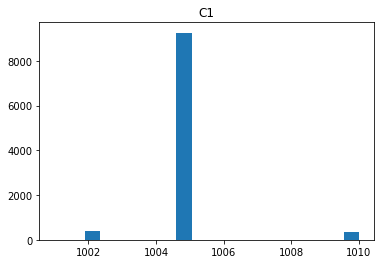

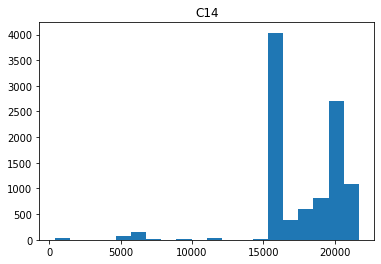

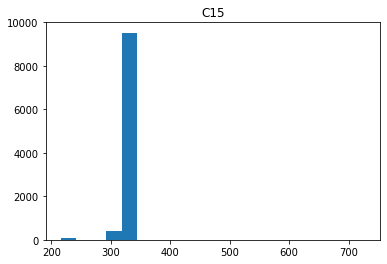

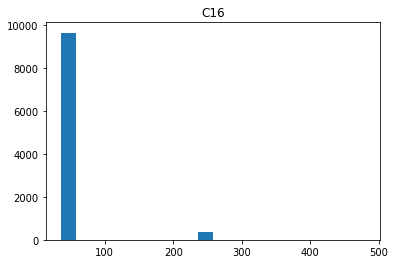

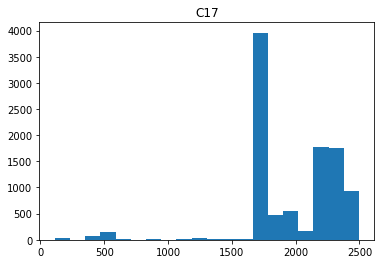

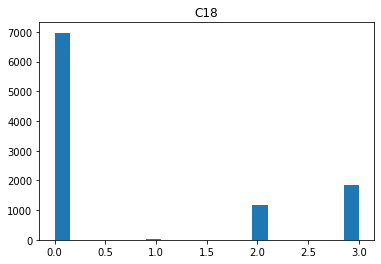

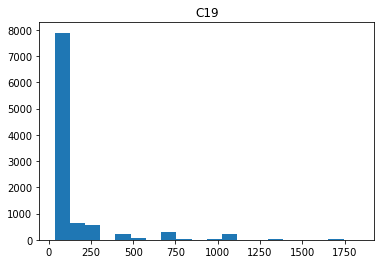

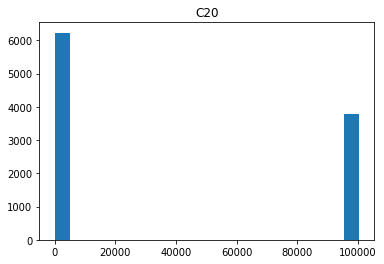

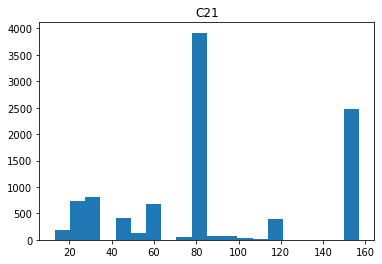

In [12]:
# plt.figure(figsize=(8, 120))
for c_name in c_name_list:
  train_data.hist(column=c_name, bins=20, grid=False)

可以看到，以C开头的几个类别型特征，其取值都较为不均衡，集中在少量的几个取值上。

### 1.3 研究每个单个特征与标签的关系

In [13]:
train_data.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

可见没有缺失值

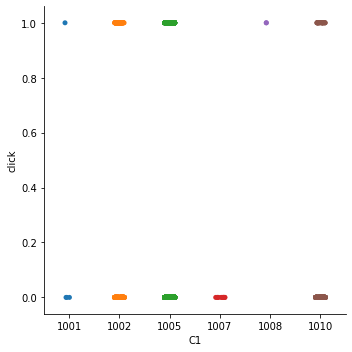

In [15]:
sns.catplot(x="C1", y="click", data=train_data)

In [69]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [70]:
import seaborn as sns
sns.__version__

'0.9.0'